<a href="https://colab.research.google.com/github/kaviyakesavan/datascienceprojects/blob/main/Project2(DS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Project 2
#Analysing the customerchurn prediction datasets
import numpy as np
import pandas as pd
df=pd.read_csv("/content/Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
# @title Task 1
#define the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
# @title Task 2
# how many rows are there in the customerchurn dataset
df.shape[0]

7043

In [ ]:
# @title Task 3
#Handling empty/null strings in Totalcharges so that it can be converted into numeric type
df[(pd.to_numeric(df['TotalCharges'],errors='coerce')).isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
# @title Task 4
#Converting TotalCharges column from object to float.
# Convert 'TotalCharges' column to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Display the DataFrame to inspect the changes
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Univariate Analysis
# @title Task 5
#how many churnrates datas are yes and No types in this given dataset
genderchurnrate=df[df.Churn=='Yes'].gender
gendernochurnrate=df[df.Churn=='No'].gender
genderchurnrate
gendernochurnrate

0       Female
1         Male
3         Male
6         Male
7       Female
         ...  
7037    Female
7038      Male
7039    Female
7040    Female
7042      Male
Name: gender, Length: 5174, dtype: object

In [ ]:
# @title Task 6
# What is the countrate of an  gender churndatas in this datasets?
genderchurnrate.value_counts()

Female    939
Male      930
Name: gender, dtype: int64

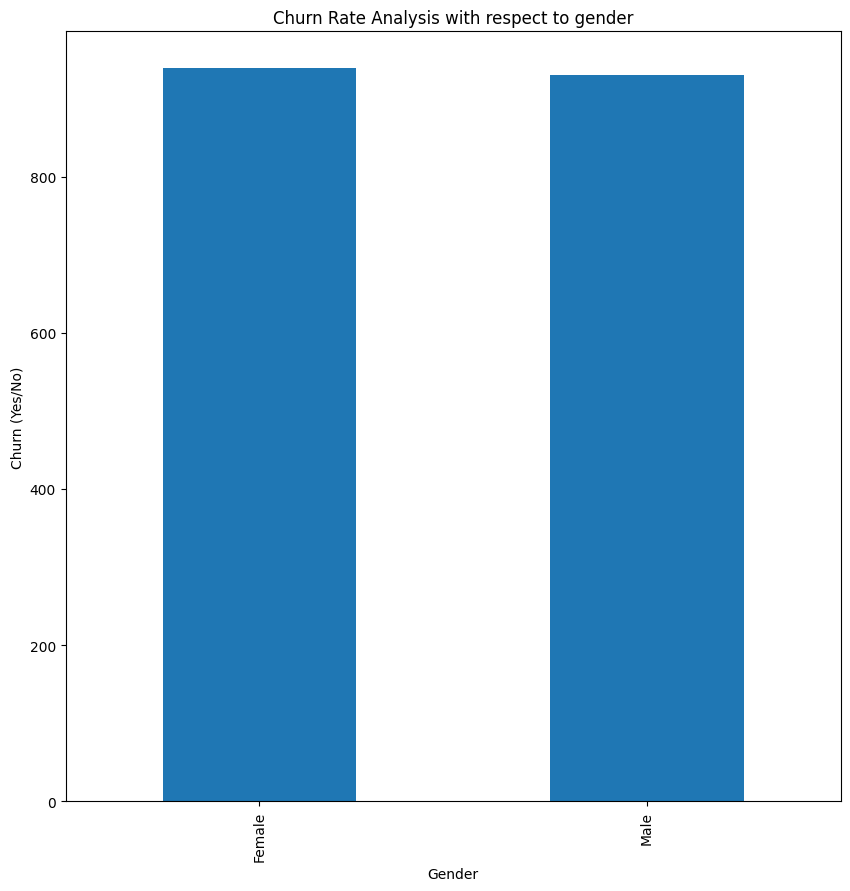

In [ ]:
# @title Task 7
#Comparing gender with churn rate
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
genderchurnrate.value_counts().plot(kind='bar')
plt.xlabel ("Gender")
plt.ylabel("Churn (Yes/No)")
plt.title("Churn Rate Analysis with respect to gender")
plt.show()


In [ ]:

# @title Task 8
#how many SeniorCitizen are in this datasets?
SCchurnrate=df[df.Churn=='Yes'].SeniorCitizen
SCchurnrate.value_counts()

0    1393
1     476
Name: SeniorCitizen, dtype: int64

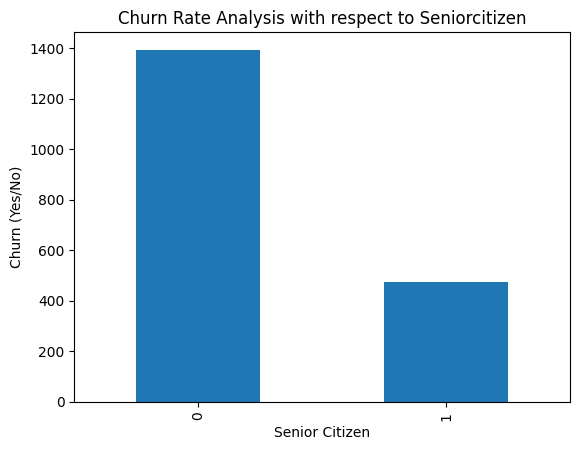

In [ ]:
# @title Task 9
#Comparing SeniorCitizen with churn rate

df.SeniorCitizen.value_counts()
SCchurnrate.value_counts().plot(kind='bar')
plt.xlabel("Senior Citizen")
plt.ylabel("Churn (Yes/No)")
plt.title("Churn Rate Analysis with respect to Seniorcitizen")
plt.show()

In [ ]:
# @title Task 10
#Removing CustomerID column
import pandas as pd
import numpy as np
df=pd.read_csv("/content/Telco-Customer-Churn.csv")
#dropping non-relevant columns
df=df.drop('customerID', axis=1)
df



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<Axes: ylabel='MonthlyCharges'>

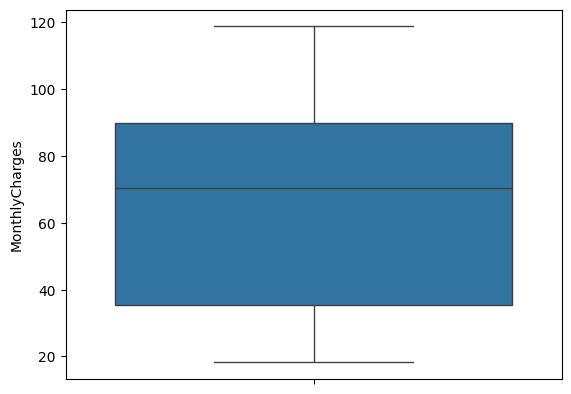

In [ ]:
#@title Task 11
# Box Plot
import seaborn as sns
sns.boxplot(df["MonthlyCharges"])


In [ ]:
#@title Task 12
df=df.drop('gender', axis=1)
df


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
#@title Task 13
#  How many different type of values in each column?
df.nunique()
#@title Task 14

SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
#@title Task 14
#defining the original_data and its also represented as a data
original_data=pd.read_csv("/content/Telco-Customer-Churn.csv")
data = original_data.copy()
data.head()
# Create a DataFrame
df = pd.DataFrame(data)
#what are the varaious datas in each column?
for column in df.columns:
    if df[column].dtypes=="object":
        print(f'{column} : {df[column].unique()}')
        print("ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ
gender : ['Female' 'Male']
ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ
Partner : ['Yes' 'No']
ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ
Dependents : ['No' 'Yes']
ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ
PhoneService : ['No' 'Yes']
ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ
MultipleLines : ['No phone service' 'No' 'Yes']
ـــــــــــــــــــــــــ

In [ ]:
#@title Task 15
#Transform categorical data to numerical representation
from sklearn.preprocessing import LabelEncoder

for column in data:
    if data[column].dtype == np.number:
        continue
    data[column] = LabelEncoder().fit_transform(data[column])
data


<ipython-input-41-45a057890178>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:
<ipython-input-41-45a057890178>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:
<ipython-input-41-45a057890178>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:
<ipython-input-41-45a057890178>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:
<ipython-input-41-45a057890178>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype i

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1


In [ ]:
#@title Task 16
#Feature Transforming
#Involves feature scaling, we will use sklearn MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(data.to_numpy())
data_scaled = pd.DataFrame(data_scaled, columns= data.columns)

data_scaled

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.763277,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.383614,0.0
1,0.562624,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.224502,0.0
2,0.364101,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.024043,1.0
3,0.785998,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,...,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.214395,0.0
4,0.924595,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.141654,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.689151,1.0,0.0,1.0,1.0,0.333333,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.5,1.0,1.000000,0.662189,0.244564,0.0
7039,0.216558,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.5,0.0,...,1.0,0.0,1.0,1.0,0.5,1.0,0.333333,0.845274,0.872588,0.0
7040,0.478131,0.0,0.0,1.0,1.0,0.152778,0.0,0.5,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.112935,0.458499,0.0
7041,0.842658,1.0,1.0,1.0,0.0,0.055556,1.0,1.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.558706,0.407351,1.0


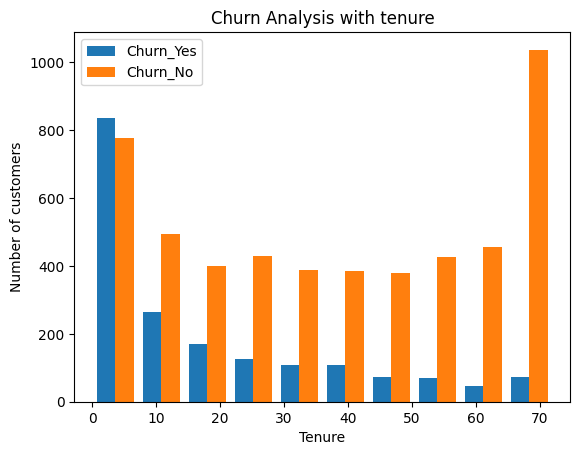

In [ ]:
#@title Task 17
#how many people with less tenure are churning more than the peoplle with more tenure
tenurewithchurn=df[df.Churn=='Yes'].tenure
tenurewithnochurn=df[df.Churn=='No'].tenure
plt.hist([tenurewithchurn,tenurewithnochurn],label=['Churn_Yes','Churn_No'])
#Add labels and Title
plt.xlabel("Tenure")
plt.ylabel('Number of customers')
plt.title('Churn Analysis with tenure')
#Add legend
plt.legend()
#Show plot
plt.show()

In [ ]:
#@title Task 18
# Statiscal measures of the dataset
df.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [ ]:
#@title Task 19
#Data processing
pd.unique(df['gender'])
df.replace({'gender':{'male':0, 'female':1}}, inplace = True)
#Encoding for smoker column
df.replace({'churn':{'yes':0,'no':1}}, inplace = True)
#Encoding for region column
df.replace({'PaymentMethod':{'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3}},inplace=True)

In [ ]:
#@title Task 20
#Splitting input features and the label(target)
X = df.drop(columns = 'TotalCharges', axis = 1)
Y = df['TotalCharges']
print(X)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL             No   
1             Yes  

In [ ]:
print(Y)

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object


In [ ]:
#@title Task 21
#Splitting the dataset into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
print(X.shape, X_train.shape, Y_test.shape)

(7043, 20) (5634, 20) (1409,)
